# ISYE6740 Project

#### Flow: 

1. Word2vec using Gensim

2. Build classifers: Random Forst, Logistic Regression, Bernoulli NB, Modified Word2Vec, LSTM.

3. Tune parameter for each model. 
 

## 1.Word2Vec

In [ ]:
#!pip3 install --upgrade gensim

In [2]:
#word2vec
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv("~/Desktop/2017spring/ISYE6740/project/Combined_News_DJIA.csv")
data.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [4]:
import nltk
# Use the punkt tokenizer
tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

In [5]:
import re
from nltk.corpus import stopwords

#reference: https://www.kaggle.com/c/word2vec-nlp-tutorial/details/part-2-word-vectors
def headline_to_wordlist(headline, remove_stopwords=False):
    if pd.isnull(headline) == False:
        headline_text = BeautifulSoup(headline).get_text()[1:]
        headline_text = re.sub("[^a-zA-Z]"," ", headline_text)
        words = headline_text.lower().split()
        if remove_stopwords:
            stops = set(stopwords.words("english"))
            words = [w for w in words if not w in stops]
        return(words)
    else:
        return ''

In [6]:
headline_to_wordlist(data.iloc[277][24])
#data.iloc[277][20]

''

In [7]:
from bs4 import BeautifulSoup
import re
def headline_to_sentences(headline, tokenizer, remove_stopwords=False):
    raw_sentences = tokenizer.tokenize(headline.strip())
    sentences = []
    for raw_sentence in raw_sentences:
        if len(raw_sentence) > 0:
            sentences.append(headline_to_wordlist(raw_sentence, \
              remove_stopwords))
    return sentences

In [8]:
pd.isnull(data.iloc[277][24])

True

### Train-Test Split

In [9]:
train = data[data['Date'] < '2015-01-01']
test = data[data['Date'] > '2014-12-31']
#train.head()

In [10]:
#for each day in training set, convert top headlines to sentences
sentences = []  # Initialize an empty list of sentences
'''For each row in training set, add the all 25 headlines to sentences.
    Skip all the empty cells.
'''
for i in range(len(train)):
    obsi = train.iloc[i]
    for j in range(len(obsi)-2):
        headj = obsi[2+j]
        if pd.isnull(headj) == False:
            headj = headj[1:]
            sentences.append(headline_to_wordlist(headj, tokenizer)) 

/Users/g/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/g/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [12]:
#words = [i for sentence in sentences for i in sentence]

In [13]:
# Set values for various parameters
num_features = 100    # Word vector dimensionality                      
min_word_count = 10   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10           # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model
from gensim.models import word2vec
from gensim.models import Word2Vec
print ("Training model...")
model = word2vec.Word2Vec(sentences, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

model.init_sims(replace=True)

2017-04-29 00:43:05,970 : INFO : collecting all words and their counts
2017-04-29 00:43:05,970 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-04-29 00:43:06,002 : INFO : PROGRESS: at sentence #10000, processed 102108 words, keeping 15644 word types
2017-04-29 00:43:06,037 : INFO : PROGRESS: at sentence #20000, processed 220767 words, keeping 23466 word types
2017-04-29 00:43:06,096 : INFO : PROGRESS: at sentence #30000, processed 342887 words, keeping 29011 word types
2017-04-29 00:43:06,145 : INFO : PROGRESS: at sentence #40000, processed 464277 words, keeping 33203 word types
2017-04-29 00:43:06,147 : INFO : collected 33288 word types from a corpus of 467342 raw words and 40268 sentences
2017-04-29 00:43:06,147 : INFO : Loading a fresh vocabulary


Training model...


2017-04-29 00:43:06,217 : INFO : min_count=10 retains 6730 unique words (20% of original 33288, drops 26558)
2017-04-29 00:43:06,219 : INFO : min_count=10 leaves 405201 word corpus (86% of original 467342, drops 62141)
2017-04-29 00:43:06,247 : INFO : deleting the raw counts dictionary of 33288 items
2017-04-29 00:43:06,250 : INFO : sample=0.001 downsamples 17 most-common words
2017-04-29 00:43:06,251 : INFO : downsampling leaves estimated 400303 word corpus (98.8% of prior 405201)
2017-04-29 00:43:06,252 : INFO : estimated required memory for 6730 words and 100 dimensions: 8749000 bytes
2017-04-29 00:43:06,280 : INFO : resetting layer weights
2017-04-29 00:43:06,426 : INFO : training model with 4 workers on 6730 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2017-04-29 00:43:07,441 : INFO : PROGRESS: at 50.08% examples, 991187 words/s, in_qsize 7, out_qsize 0
2017-04-29 00:43:08,450 : INFO : PROGRESS: at 89.03% examples, 881265 words/s, in_qsize 8, out_

In [14]:
def makeFeatureVec(headline, model, num_features):
    '''
    Given any headline that contains an array of words
    Return an average feature with length of num_features
    '''
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((num_features,),dtype="float32")

    nwords = 0.
    index2word_set = set(model.wv.index2word)

    for word in headline:
        if word in index2word_set: 
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec


def getAvgFeatureVecs(headlines, model, num_features=100):
    '''
    Given a list of headlines, convert each headline to a vector by calling makeFeatureVec 
    Return a weighted feature vector with num_features using pre-defined weights
    '''
    headlinesFeatureVecs = []
    for headline in headlines:
        if len(headline) >= 1:
            headlinesFeatureVecs.append(makeFeatureVec(headline, model,num_features)) 
        else:
            #for empty headline, add zeros vector instead
            print("empty headline found")
            headlinesFeatureVecs.append(np.zeros((num_features,),dtype="float32"))
    return headlinesFeatureVecs

In [13]:
#take a look at the result
model.most_similar("man")

model.most_similar("crash")

[('blast', 0.9916792511940002),
 ('exploded', 0.9886888265609741),
 ('deadly', 0.987707257270813),
 ('bombers', 0.9869003891944885),
 ('feared', 0.9866073727607727),
 ('explosions', 0.9865422248840332),
 ('kashmir', 0.9846357107162476),
 ('achers', 0.9843910932540894),
 ('explosion', 0.9835927486419678),
 ('southern', 0.9830011129379272)]

In [69]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X = model[model.wv.vocab]
X_tsne = tsne.fit_transform(X)

In [54]:
#[i for i in vocab]

In [71]:
plt.scatter(X[:, 0], X[:, 1])
vocab = model.wv.vocab.keys()
vocal = [i for i in vocab]

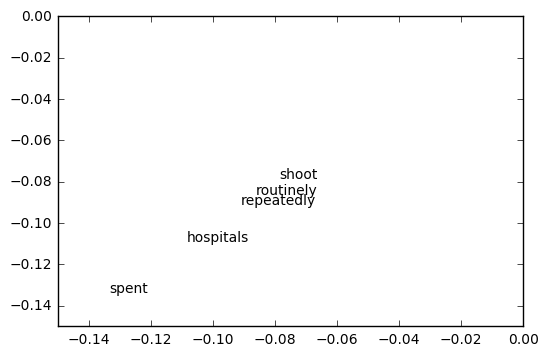

In [87]:
vocab_list = [i for i in vocab]
random_idx = np.random.randint(low=0,high=6730,size=5)
X_sub0 = [X[i,0] for i in random_idx]
X_sub0 = [X[i,3] for i in random_idx]
plt.xlim(-0.15,0)
plt.ylim(-0.15,0)    
vocab_sub = [vocab_list[i] for i in random_idx]
for label, x, y in zip(vocab_sub, X_sub0, X_sub0):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
plt.show()

In [20]:
#Assign different weight to each headline
weights = [(25-i)/25 for i in range(25)]
#weights = [1 for i in range(25)] #if all equal weights?-->worse
x_train, x_test = [], []

for row in range(len(train)):
    #collection of top25 news for ith row
    headlines = [headline_to_wordlist(headline,remove_stopwords=True) \
                 for headline in train.iloc[row,2:27]]
    
    #for each headline, find corresponding average feature
    row_features = getAvgFeatureVecs(headlines, model, num_features)
    
    #get 25 weighted featurized vectors
    weighted_row = np.average(row_features, axis=0, weights=weights)
    x_train.append(weighted_row)

for row in range(len(test)):
    #collection of top25 news for ith row
    headlines = [headline_to_wordlist(headline,remove_stopwords=True) \
                 for headline in test.iloc[row,2:27]]
    
    #for each headline, find corresponding average feature
    row_features = getAvgFeatureVecs(headlines, model, num_features)
    
    #get 25 weighted featurized vectors
    weighted_row = np.average(row_features, axis=0, weights=weights)
    x_test.append(weighted_row)

/Users/g/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /Users/g/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))
/Users/g/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:17: RuntimeWarning: invalid value encountered in true_divide


empty headline found
empty headline found
empty headline found
empty headline found
empty headline found
empty headline found
empty headline found
empty headline found


In [21]:
y_train = np.array(train['Label']) 
y_test = np.array(test['Label'])

In [22]:
#np.any(np.isnan(x_train)) #contains nan
#np.all(np.isfinite(x_train))

x_train_1 = np.nan_to_num(x_train)
x_test_1 = np.nan_to_num(x_test)

print('training set has shape:',x_train_1.shape)
print('testing set has shape:',x_test_1.shape)

training set has shape: (1611, 100)
testing set has shape: (378, 100)


## 2.Models

In [23]:
from sklearn.model_selection import cross_val_score, TimeSeriesSplit

### 2.1 Random Forest & Logistic Classifier & NB

In [136]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500)
forest = forest.fit(x_train_1,y_train)

In [137]:
from sklearn import metrics
pred_rf = forest.predict(x_test_1)
rf_acc = metrics.accuracy_score(y_test, pred_rf) 
print("Random forest accuracy is: ", rf_acc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rf)
print("auc is: ",metrics.auc(fpr, tpr))

score = cross_val_score(forest, x_train_1, y_train, cv=TimeSeriesSplit(n_splits=3),n_jobs=-1).mean()
print("CV score for random forest is:" ,score)

Random forest accuracy is:  0.47619047619
auc is:  0.473622311828
CV score for random forest is: 0.507462686567


In [141]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [142]:
logistic = logistic.fit(x_train_1,y_train)
pred_log = logistic.predict(np.nan_to_num(x_test))
log_acc = metrics.accuracy_score(y_test, pred_log)
print("Logistic regression accuracy is: ", log_acc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_log)
print("auc is: ",metrics.auc(fpr, tpr))

score = cross_val_score(logistic, x_train_1, y_train, cv=TimeSeriesSplit(n_splits=3),n_jobs=-1).mean()
print("CV score for logistic regression is:" , score)

Logistic regression accuracy is:  0.510582010582
auc is:  0.502772177419
CV score for logistic regression is: 0.539800995025


In [139]:
from sklearn.naive_bayes import BernoulliNB
bernoulliNB = BernoulliNB()
bernoulliNB = bernoulliNB.fit(x_train_1,y_train)

In [140]:
pred_bnb = bernoulliNB.predict(np.nan_to_num(x_test))
bnb_acc = metrics.accuracy_score(y_test, pred_bnb) 
print("BernoulliNB accuracy is: ", bnb_acc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_bnb)
print("auc is: ",metrics.auc(fpr, tpr))

BernoulliNB accuracy is:  0.518518518519
auc is:  0.510836693548


In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(x_train_1,y_train)

In [64]:
knn = KNeighborsClassifier(n_neighbors=9)
knn = knn.fit(x_train_1,y_train)
pred_knn = knn.predict(np.nan_to_num(x_test))
knn_acc = metrics.accuracy_score(y_test, pred_knn) 
print("KNN accuracy is: ", knn_acc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_knn)
print("auc is: ",metrics.auc(fpr, tpr))

KNN accuracy is:  0.529100529101
auc is:  0.527889784946


### 2.2 Modified Word2Vec

In [46]:
#what if we add in the influence from previous k days
X_LSTM = []
Y_LSTM = []
STEP_SIZE = 1
WINDOW = 3 #k
W = [(i+1)/(WINDOW+1) for i in range(WINDOW+1)]
for i in range(0,len(train) - WINDOW, STEP_SIZE):
    vectors = x_train[i : i + WINDOW + 1] #number of observations including today's
    vector_weighted = np.average(vectors, axis=0, weights=W)
    X_LSTM.append(vector_weighted)
    Y_LSTM.append(y_train[i + WINDOW])
    
X_LSTM_train = np.array(X_LSTM)
Y_LSTM_train = np.array(Y_LSTM)

In [47]:
X_LSTM_test = []
Y_LSTM_test = []
STEP_SIZE = 1
WINDOW = 3 #k
W = [(i+1)/(WINDOW+1) for i in range(WINDOW+1)]
for i in range(0,len(test) - WINDOW, STEP_SIZE):
    vectors = x_test[i : i + WINDOW + 1] #number of observations including today's
    vector_weighted = np.average(vectors, axis=0, weights=W)
    X_LSTM_test.append(vector_weighted)
    Y_LSTM_test.append(y_test[i + WINDOW])
    
X_LSTM_test = np.array(X_LSTM_test)
Y_LSTM_test = np.array(Y_LSTM_test)

In [48]:
print(len(X_LSTM),len(Y_LSTM)) 
print(len(X_LSTM_test),len(Y_LSTM_test))
X_LSTM_train_1 = np.nan_to_num(X_LSTM_train)
X_LSTM_test_1 = np.nan_to_num(X_LSTM_test)

1608 1608
375 375


In [152]:
# Fit a random forest to the training data, using 100 trees
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 500,max_features=None,max_depth=20,random_state=123456)
forest = forest.fit(X_LSTM_train_1,Y_LSTM_train)

In [153]:
from sklearn import metrics
pred_rf = forest.predict(np.nan_to_num(X_LSTM_test_1))
print("accuracy is: ",metrics.accuracy_score(Y_LSTM_test, pred_rf)) 

fpr, tpr, thresholds = metrics.roc_curve(Y_LSTM_test, pred_rf)
print("auc is: ",metrics.auc(fpr, tpr))

accuracy is:  0.469333333333
auc is:  0.466110858183


In [311]:
score = cross_val_score(forest, X_LSTM_train_1, Y_LSTM_train, cv=TimeSeriesSplit(n_splits=3),n_jobs=-1).mean()
print("CV score for random forest is:" ,score)

CV score for random forest is: 0.508816120907


In [154]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(C = 1,penalty="l1",random_state=123456)
logistic = logistic.fit(X_LSTM_train_1,Y_LSTM_train)

In [155]:
pred_log = logistic.predict(X_LSTM_test_1)
print("accuracy is: ",metrics.accuracy_score(Y_LSTM_test, pred_log)) 

fpr, tpr, thresholds = metrics.roc_curve(Y_LSTM_test, pred_log)
print("auc is: ",metrics.auc(fpr, tpr))

accuracy is:  0.509333333333
auc is:  0.5


In [156]:
score = cross_val_score(logistic, X_LSTM_train_1, Y_LSTM_train, cv=TimeSeriesSplit(n_splits=3),n_jobs=-1).mean()
print("CV score for logistic regression is:" , score)

CV score for logistic regression is: 0.544776119403


In [157]:
from sklearn.naive_bayes import BernoulliNB
bernoulliNB = BernoulliNB(alpha = 1)
bernoulliNB = bernoulliNB.fit(X_LSTM_train_1,Y_LSTM_train)

In [158]:
pred_bnb = bernoulliNB.predict(X_LSTM_test_1)
print("accuracy is: ",metrics.accuracy_score(Y_LSTM_test, pred_bnb)) 

fpr, tpr, thresholds = metrics.roc_curve(Y_LSTM_test, pred_bnb)
print("auc is: ",metrics.auc(fpr, tpr))

accuracy is:  0.528
auc is:  0.519718870931


In [58]:
knn = KNeighborsClassifier(n_neighbors=13)
knn = knn.fit(X_LSTM_train_1,Y_LSTM_train)
pred_knn = knn.predict(np.nan_to_num(X_LSTM_test_1))
knn_acc = metrics.accuracy_score(Y_LSTM_test, pred_knn) 
print("KNN accuracy is: ", knn_acc)

fpr, tpr, thresholds = metrics.roc_curve(Y_LSTM_test, pred_knn)
print("auc is: ",metrics.auc(fpr, tpr))

KNN accuracy is:  0.504
auc is:  0.501835306169


In [65]:
from sklearn.metrics import confusion_matrix
#cnf_matrix = confusion_matrix(Y_LSTM_test, pred_bnb)
cnf_matrix = confusion_matrix(y_test, pred_knn)

Confusion matrix, without normalization
[[ 84 102]
 [ 76 116]]


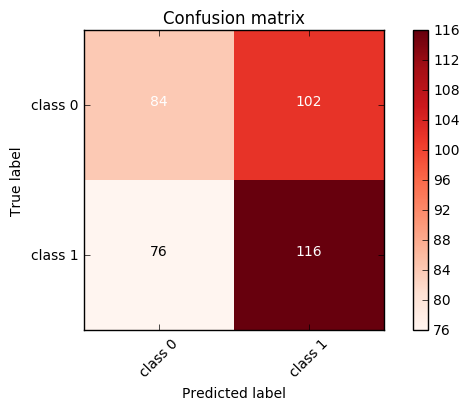

In [68]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 1.5
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix,['class 0','class 1'], title='Confusion matrix')
plt.show()

In [63]:
pred_bnb_prob = bernoulliNB.predict_proba(X_LSTM_test_1)
pred_bnb_prob

NameError: name 'bernoulliNB' is not defined

/Users/g/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


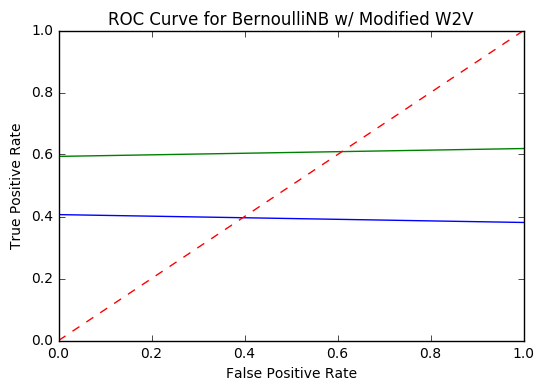

In [165]:
import matplotlib.pyplot as plt
plt.title('ROC Curve for BernoulliNB w/ Modified W2V')
plt.plot(pred_bnb_prob)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 2.3 LSTM

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, GRU
from keras import regularizers 
from keras.layers import Dropout
from keras.layers.embeddings import Embedding
from keras import optimizers

In [410]:
X_LSTM = []
Y_LSTM = []
STEP_SIZE = 1
WINDOW = 2 

for i in range(0,len(train) - WINDOW, STEP_SIZE):
    vectors = x_train[i : i + WINDOW] #number of observations including today's
    X_LSTM.append(vectors)
    Y_LSTM.append(y_train[i + WINDOW])
    
X_LSTM = np.array(X_LSTM)
Y_LSTM = np.array(Y_LSTM)

X_LSTM_test = []
Y_LSTM_test = []

for i in range(0,len(test) - WINDOW, STEP_SIZE):
    vectors = x_test[i : i + WINDOW] #number of observations including today's
    X_LSTM_test.append(vector)
    Y_LSTM_test.append(y_test[i + WINDOW])
    
X_LSTM_test = np.array(X_LSTM_test)
Y_LSTM_test = np.array(Y_LSTM_test)

In [411]:
model = Sequential()
model.add(GRU(1,input_shape=(X_LSTM.shape[1], X_LSTM.shape[2]),\
              kernel_regularizer=regularizers.l1(1e3)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
sgd = optimizers.SGD(lr=0.01, decay=0.1, momentum=1000, nesterov=True, clipnorm=0.1)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['acc'])
print(model.summary())
model.fit(X_LSTM, Y_LSTM, epochs=1, batch_size=X_LSTM.shape[0], validation_data=(X_LSTM_test, Y_LSTM_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_51 (GRU)                 (None, 1)                 306       
_________________________________________________________________
dropout_51 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 2         
Total params: 308
Trainable params: 308
Non-trainable params: 0
_________________________________________________________________
None
Train on 1609 samples, validate on 376 samples
Epoch 1/1
1609/1609 [==============================] - 6s - loss: 37140.2617 - acc: 0.4953 - val_loss: nan - val_acc: 0.0000e+00


In [ ]:
classes = model.predict_classes(X_LSTM, batch_size=X_LSTM.shape[0])
classes[0]

## 3.Tuning Parameters

### Random Forest: tune max_features & n_estimators---Grid Search

In [375]:
from collections import defaultdict
grid_score = defaultdict(float)
for f in range(5,105,5):
    for n in range(100,1000,100):
        forest = RandomForestClassifier(n_estimators = n, max_features=f, random_state=123456)
        forest = forest.fit(x_train_1,y_train)
        score = cross_val_score(forest, x_train_1, y_train, cv=TimeSeriesSplit(n_splits=3),n_jobs=-1).mean()
        print("Random forest CV score with n equals to {}".format(n),"f equals to {}".format(f),"is:", score)
        grid_score[(f,n)] = score

Random forest CV score with n equals to 100 f equals to 5 is: 0.507462686567
Random forest CV score with n equals to 200 f equals to 5 is: 0.50912106136
Random forest CV score with n equals to 300 f equals to 5 is: 0.501658374793
Random forest CV score with n equals to 400 f equals to 5 is: 0.500829187396
Random forest CV score with n equals to 500 f equals to 5 is: 0.499170812604
Random forest CV score with n equals to 600 f equals to 5 is: 0.498341625207
Random forest CV score with n equals to 700 f equals to 5 is: 0.502487562189
Random forest CV score with n equals to 800 f equals to 5 is: 0.499170812604
Random forest CV score with n equals to 900 f equals to 5 is: 0.491708126036
Random forest CV score with n equals to 100 f equals to 10 is: 0.513266998342
Random forest CV score with n equals to 200 f equals to 10 is: 0.496683250415
Random forest CV score with n equals to 300 f equals to 10 is: 0.503316749585
Random forest CV score with n equals to 400 f equals to 10 is: 0.507462686

In [384]:
#sorted(grid_score, key=grid_score.get, reverse=True) #<--sort by the value

#Best combination:
    #n_estimators --> 500
    #max feature --> 100

In [387]:
forest = RandomForestClassifier(n_estimators = 500, max_features=100, random_state=123456)
forest = forest.fit(x_train_1,y_train)

In [388]:
pred_rf = forest.predict(x_test_1)
print("Tuned random forest accuracy is: ", metrics.accuracy_score(y_test, pred_rf)) 

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_rf)
print("Tuned random forest auc is: ",metrics.auc(fpr, tpr))

Tuned random forest accuracy is:  0.449735449735
Tuned random forest auc is:  0.447664650538


###  Logistic regression: tune C

In [399]:
C = [1e-3,1e-2,1e-1,1,10,100,1000]
for c in C:
    logistic = LogisticRegression(C = c, penalty="l1",random_state=123456)
    logistic = logistic.fit(x_train_1,y_train)
    score = cross_val_score(logistic, x_train_1, y_train, cv=TimeSeriesSplit(n_splits=3),n_jobs=-1).mean()
    print("Logistic regression CV score with C equal to {}".format(c),"is:", score)
#Use C=0.1 or 1

Logistic regression CV score with C equal to 0.001 is: 0.455223880597
Logistic regression CV score with C equal to 0.01 is: 0.455223880597
Logistic regression CV score with C equal to 0.1 is: 0.544776119403
Logistic regression CV score with C equal to 1 is: 0.544776119403
Logistic regression CV score with C equal to 10 is: 0.528192371476
Logistic regression CV score with C equal to 100 is: 0.51824212272
Logistic regression CV score with C equal to 1000 is: 0.524875621891


In [403]:
logistic = LogisticRegression(C = .1, penalty="l1",random_state=123456)
logistic = logistic.fit(x_train_1,y_train)

pred_log = logistic.predict(x_test_1)
print("Tuned logistic regression accuracy is: ",metrics.accuracy_score(y_test, pred_log)) 

fpr, tpr, thresholds = metrics.roc_curve(y_test, pred_log)
print("Tuned logistic regression auc is: ",metrics.auc(fpr, tpr))

Tuned logistic regression accuracy is:  0.507936507937
Tuned logistic regression auc is:  0.5
